In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

In [23]:
labels = pd.read_csv('../csv/train_labels.csv')
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [24]:
values = pd.read_csv('../csv/train_values.csv')
values.head(10).T

,0,1,2,3,4,5,6,7,8,9
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500
geo_level_1_id,6,8,21,22,11,8,9,20,0,26
geo_level_2_id,487,900,363,418,131,558,475,323,757,886
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1
age,30,10,10,10,30,10,25,0,15,0
area_percentage,6,8,5,6,8,9,3,8,8,13
height_percentage,5,7,5,5,9,5,4,6,6,4
land_surface_condition,t,o,t,t,t,t,n,t,t,t
foundation_type,r,r,r,r,r,r,r,w,r,i


In [25]:
ages = values.loc[:, ["building_id", "age"]]
ages_damage = ages.merge(labels, left_on = "building_id", right_on = "building_id")
ages_damage = ages_damage.loc[:, ["age", "damage_grade"]]
ages_damage

,age,damage_grade
0,30,3
1,10,2
2,10,3
3,10,2
4,30,3
...,...,...
260596,55,2
260597,0,3
260598,55,3
260599,10,2


<AxesSubplot:title={'center':'Relacion entre la longevidad de la estructura y el nivel de destruccion.'}, xlabel='Edad de la construccion', ylabel='Promedio de nivel de destruccion'>

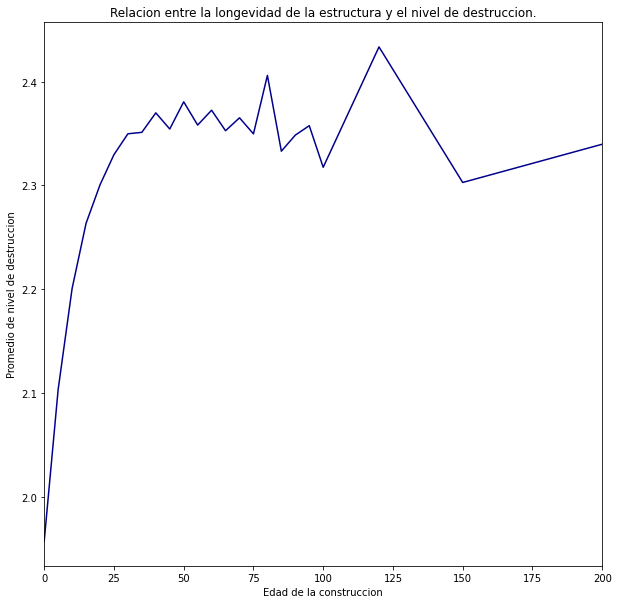

In [26]:
ages_damage['avg_damage_grade_for_age'] = ages_damage.groupby('age')['damage_grade'].transform('mean')
ages_damage['more_than_100_buildings'] = ages_damage.groupby('age')['damage_grade'].transform('count') > 100
ages_damage = ages_damage[ages_damage["more_than_100_buildings"]]
avg_dmg_per_age = ages_damage.loc[:, ["age", "avg_damage_grade_for_age"]].groupby('age').agg({"avg_damage_grade_for_age": "max"})
avg_dmg_per_age["avg_damage_grade_for_age"].plot(figsize = (10,10),\
                                                title = "Relacion entre la longevidad de la estructura y el nivel de destruccion.",\
                                                xlim = (0, 200),\
                                                color = "darkblue",\
                                                xlabel = "Edad de la construccion",\
                                                ylabel = "Promedio de nivel de destruccion")

In [27]:
ages = values[["building_id", "height_percentage"]]
height_damage = ages.merge(labels, left_on = "building_id", right_on = "building_id")
height_damage = height_damage[["height_percentage", "damage_grade"]]
height_damage

,height_percentage,damage_grade
0,5,3
1,7,2
2,5,3
3,5,2
4,9,3
...,...,...
260596,3,2
260597,5,3
260598,7,3
260599,6,2


<AxesSubplot:title={'center':'Relacion entre la altura (normalizada) de la estructura y el nivel de destruccion.'}, xlabel='Altura normalizada de la construccion', ylabel='Promedio de nivel de destruccion'>

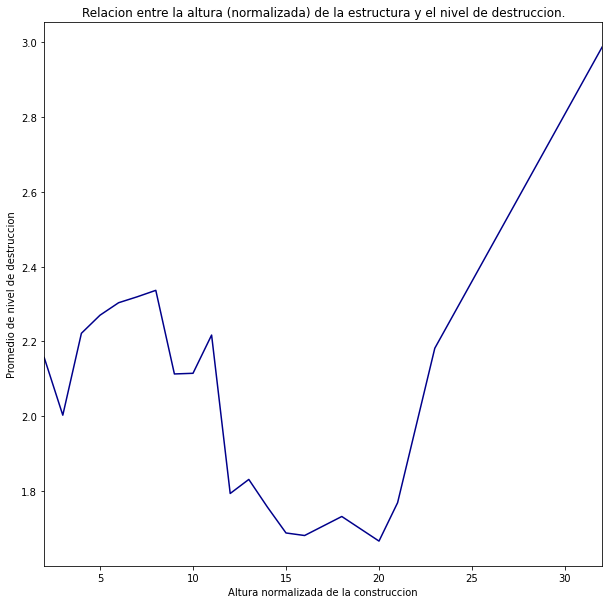

In [28]:
height_damage['avg_damage_grade_for_height'] = height_damage.groupby('height_percentage')['damage_grade'].transform('mean')
height_damage['more_than_10_buildings'] = height_damage.groupby('height_percentage')['damage_grade'].transform('count') > 10
height_damage = height_damage[height_damage["more_than_10_buildings"]]
avg_dmg_per_height = height_damage[["height_percentage", "avg_damage_grade_for_height"]].groupby('height_percentage').agg({"avg_damage_grade_for_height": "max"})
avg_dmg_per_height["avg_damage_grade_for_height"].plot(figsize = (10,10),\
                                                title = "Relacion entre la altura (normalizada) de la estructura y el nivel de destruccion.",\
                                                xlim = (2, 32),\
                                                color = "darkblue",\
                                                xlabel = "Altura normalizada de la construccion",\
                                                ylabel = "Promedio de nivel de destruccion")

In [29]:
areas = values[["building_id", "area_percentage"]]
area_damage = areas.merge(labels, left_on = "building_id", right_on = "building_id")
area_damage = area_damage[["area_percentage", "damage_grade"]]
area_damage

,area_percentage,damage_grade
0,6,3
1,8,2
2,5,3
3,6,2
4,8,3
...,...,...
260596,6,2
260597,6,3
260598,6,3
260599,14,2


<AxesSubplot:title={'center':'Relacion entre el area normalizada de la estructura y el nivel de destruccion.'}, xlabel='Area normalizada de la construccion', ylabel='Promedio de nivel de destruccion'>

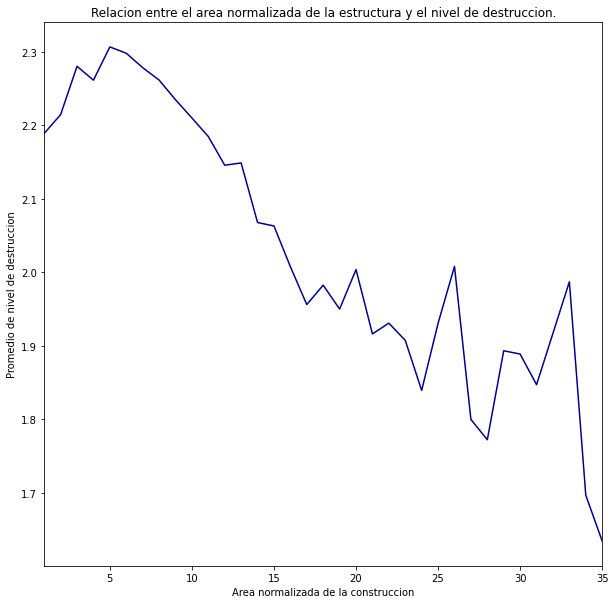

In [30]:
area_damage['avg_damage_grade_for_area'] = area_damage.groupby('area_percentage')['damage_grade'].transform('mean')
area_damage['more_than_10_buildings'] = area_damage.groupby('area_percentage')['damage_grade'].transform('count') > 70
area_damage = area_damage[area_damage["more_than_10_buildings"]]
avg_dmg_per_height = area_damage[["area_percentage", "avg_damage_grade_for_area"]].groupby('area_percentage').agg({"avg_damage_grade_for_area": "max"})
avg_dmg_per_height["avg_damage_grade_for_area"].plot(figsize = (10,10),\
                                                title = "Relacion entre el area normalizada de la estructura y el nivel de destruccion.",\
                                                xlim = (1, area_damage["area_percentage"].max()),\
                                                color = "darkblue",\
                                                xlabel = "Area normalizada de la construccion",\
                                                ylabel = "Promedio de nivel de destruccion")

In [31]:
height_floor_damage = labels.merge(values[["building_id", "count_floors_pre_eq", "height_percentage"]], left_on = "building_id", right_on= "building_id")
height_floor_damage["avg_height_per_floor"] = height_floor_damage["height_percentage"]/height_floor_damage["count_floors_pre_eq"]
height_floor_damage["avg_height_per_floor"] = height_floor_damage["avg_height_per_floor"].apply(np.ceil)
height_floor_damage = height_floor_damage[["damage_grade", "avg_height_per_floor"]]
height_floor_damage

,damage_grade,avg_height_per_floor
0,3,3.0
1,2,4.0
2,3,3.0
3,2,3.0
4,3,3.0
...,...,...
260596,2,3.0
260597,3,3.0
260598,3,3.0
260599,2,3.0


<AxesSubplot:title={'center':'Relacion entre la altura promedio por piso de la estructura y el nivel de destruccion.'}, xlabel='Altura normalizada promedio por piso', ylabel='Promedio de nivel de destruccion'>

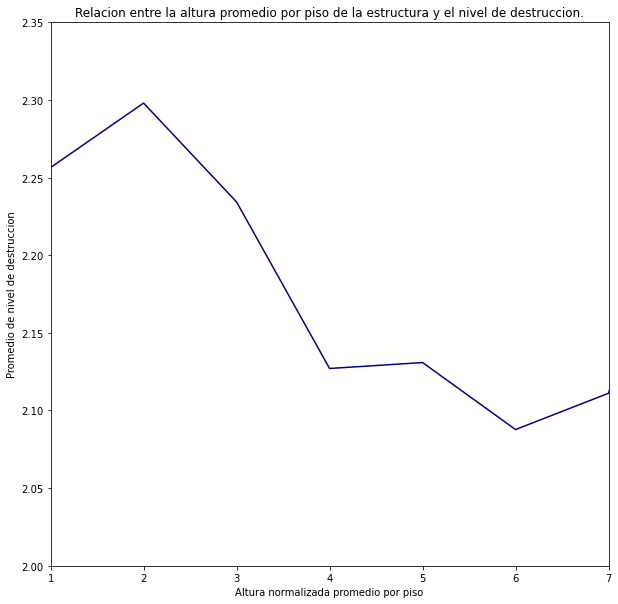

In [32]:
height_floor_damage['avg_damage_grade_for_height_per_floor'] = height_floor_damage.groupby('avg_height_per_floor')['damage_grade'].transform('mean')
height_floor_damage['more_than_50_buildings'] = height_floor_damage.groupby('avg_damage_grade_for_height_per_floor')['damage_grade'].transform('count') > 50
height_floor_damage = height_floor_damage[height_floor_damage["more_than_50_buildings"]]
avg_dmg_per_height_per_floor = height_floor_damage[["avg_height_per_floor", "avg_damage_grade_for_height_per_floor"]].groupby('avg_height_per_floor').agg({"avg_damage_grade_for_height_per_floor": "max"})
avg_dmg_per_height_per_floor["avg_damage_grade_for_height_per_floor"].plot(figsize = (10,10),\
                                                title = "Relacion entre la altura promedio por piso de la estructura y el nivel de destruccion.",\
                                                xlim = (1, 7),\
                                                ylim = (2.0, 2.35),\
                                                color = "darkblue",\
                                                xlabel = "Altura normalizada promedio por piso",\
                                                ylabel = "Promedio de nivel de destruccion")

In [33]:
ages_damage["age"] = (np.ceil(ages_damage["age"] / 20) * 20).astype('int')
ages_damage["age"] = np.where(ages_damage["age"] == 0, 20, ages_damage["age"])
ages_damage = ages_damage[["age", "damage_grade"]]
ages_damage

,age,damage_grade
0,40,3
1,20,2
2,20,3
3,20,2
4,40,3
...,...,...
260596,60,2
260597,20,3
260598,60,3
260599,20,2


In [34]:
ages_damage["amount_for_damage_and_age"] = ages_damage.groupby(["age", "damage_grade"])["age"].transform("count")
ages_damage_pivot = ages_damage.pivot_table(index="age", columns="damage_grade", values="amount_for_damage_and_age")
ages_list = ages_damage_pivot.index.to_list()
for age in ages_list:
    values = []
    for i in [1, 2, 3]:
        values.append(ages_damage_pivot.loc[age, i] / (ages_damage_pivot.loc[age, 1] + ages_damage_pivot.loc[age, 2] + ages_damage_pivot.loc[age, 3]) * 100) 
    ages_damage_pivot.loc[age] = values
ages_damage_pivot


damage_grade,1,2,3
age,,,
20,13.184396,56.041025,30.774580
40,3.779275,57.884485,38.336239
60,2.333504,58.411401,39.255096
80,1.260315,59.429857,39.309827
100,1.051213,64.447439,34.501348
120,1.111111,54.444444,44.444444
160,0.704225,68.309859,30.985915
200,2.830189,60.377358,36.792453
1000,12.877698,59.136691,27.985612


In [35]:
ages_damage_pivot.index = ["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "140-160", "180-200", "980-1000"]

<AxesSubplot:title={'center':'% de grado de destruccion sobre destruccion total por antiguedad.'}, xlabel='Edad de la construccion.', ylabel='% de grado de destruccion sobre destruccion total.'>

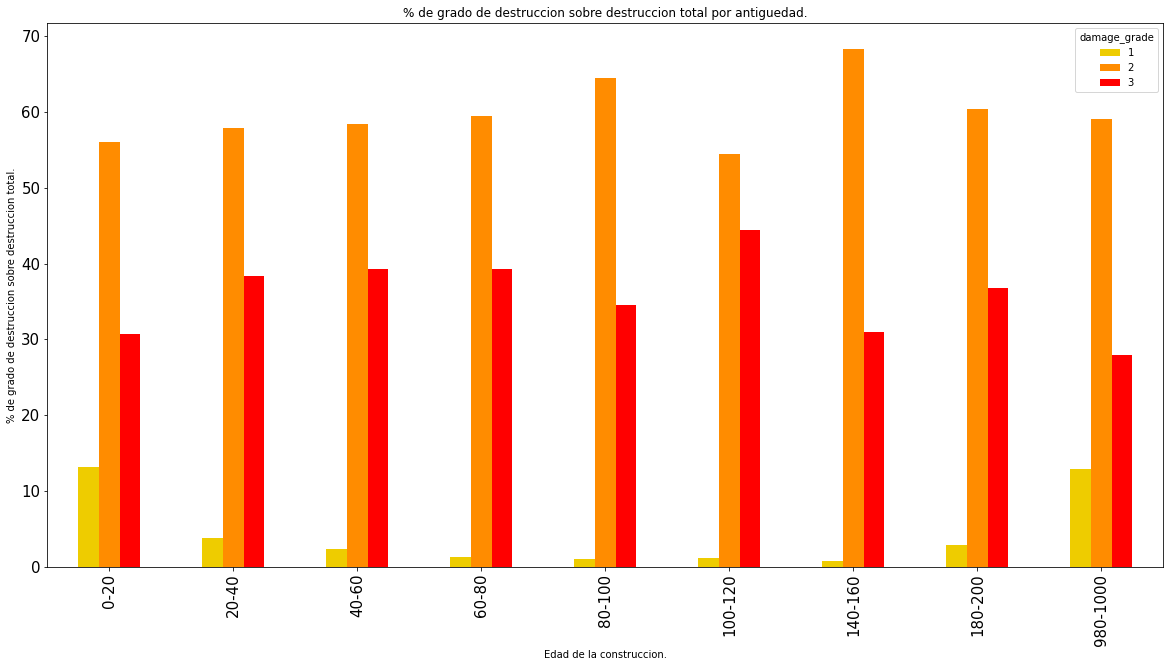

In [36]:
ages_damage_pivot.plot(kind = "bar",\
     figsize = (20,10),\
     title = "% de grado de destruccion sobre destruccion total por antiguedad.",\
     xlabel = "Edad de la construccion.",\
     ylabel = "% de grado de destruccion sobre destruccion total.",\
     color = ["#eecc00", "darkorange", "red"],\
     fontsize=15)

In [37]:
# ages_damage_pivot
# ages_damage_pivot.loc[:, [20, 40, 60, 80, 100]].plot(kind = "pie", figsize = (20,4), title = "% de grado de destruccion", subplots="True", sharey=False)

In [38]:
height_damage["height_percentage"] = (np.ceil(height_damage["height_percentage"] / 4) * 4).astype('int')
height_damage["height_percentage"] = np.where(height_damage["height_percentage"] == 0, 4, height_damage["height_percentage"])
height_damage = height_damage[["height_percentage", "damage_grade"]]
height_damage

,height_percentage,damage_grade
0,8,3
1,8,2
2,8,3
3,8,2
4,12,3
...,...,...
260596,4,2
260597,8,3
260598,8,3
260599,8,2


In [42]:
height_damage["amount_for_damage_and_height"] = height_damage.groupby(["height_percentage", "damage_grade"])["height_percentage"].transform("count")
height_damage_pivot = height_damage.pivot_table(index="height_percentage", columns="damage_grade", values="amount_for_damage_and_height").fillna(0)
heights_list = height_damage_pivot.index.to_list()
for age in heights_list:
    values = []
    for i in [1, 2, 3]:
        values.append(height_damage_pivot.loc[age, i] / (height_damage_pivot.loc[age, 1] + height_damage_pivot.loc[age, 2] + height_damage_pivot.loc[age, 3]) * 100) 
    height_damage_pivot.loc[age] = values
height_damage_pivot

damage_grade,1,2,3
height_percentage,,,
4,15.441287,55.548100,29.010613
8,6.531427,57.517048,35.951525
12,16.541225,57.201505,26.257270
16,36.342593,49.845679,13.811728
20,41.346154,46.153846,12.500000
24,29.166667,45.833333,25.000000
32,0.000000,1.333333,98.666667


In [44]:
height_damage_pivot.index = ["0-4", "4-8", "8-12", "12-16", "16-20", "20-24", "24-32"]

<AxesSubplot:title={'center':'% de grado de destruccion sobre destruccion total por altura normalizada.'}, xlabel='Altura normalizada de la construccion.', ylabel='% de grado de destruccion sobre destruccion total.'>

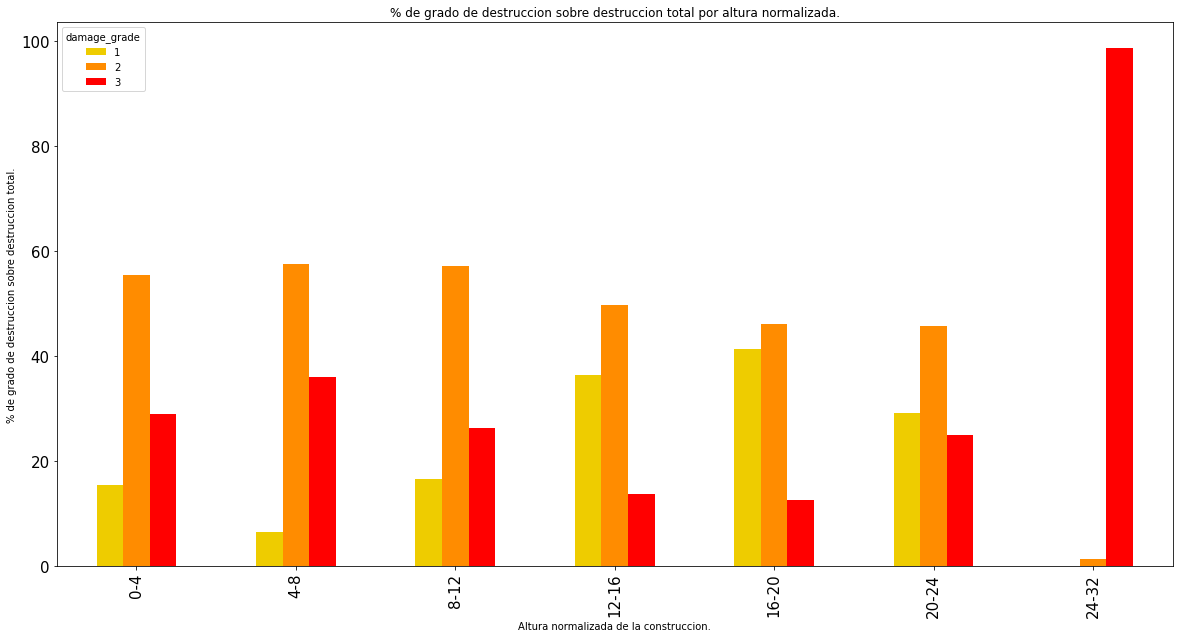

In [46]:
height_damage_pivot.plot(kind = "bar",\
     figsize = (20,10),\
     title = "% de grado de destruccion sobre destruccion total por altura normalizada.",\
     xlabel = "Altura normalizada de la construccion.",\
     ylabel = "% de grado de destruccion sobre destruccion total.",\
     color = ["#eecc00", "darkorange", "red"],\
     fontsize=15)